Calculates the contribution of Feynman-x ranges to atm. lepton flux
-------------------------------------------------------------------

In [1]:
#basic imports and ipython setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os


import matplotlib.pyplot as plt
import numpy as np
os.chdir('..')

#import solver related modules
from MCEq.core import MCEqRun
from mceq_config import config
#import primary model choices
import CRFluxModels as pm

In [2]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3_rc3b',
#primary cosmic ray flux model
#support a tuple (primary model class (not instance!), arguments)
primary_model=(pm.Thunman, None),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0,
#expand the rest of the options from mceq_config.py
**config
)


Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta-", "D*0", 
"D*0-bar", "XiC*0-bar", "XiC*+-bar", "XiC*+", "XiC*0", "Ds*+", "Ds*

Select xf ranges by combining indices to tuples
-----------------------------------------------

In [3]:
print '\nindex | xf value'
xf_bins = mceq_run.y.e_bins/mceq_run.y.e_bins[-1]
for i, e in enumerate(xf_bins[-15:]):
    print '{0:5}       {1:3.2f}'.format(i-15, e) 

range_tups = [(0, -11), (-10,-8), (-7,-6), (-5,-4), (-3,-1), (0,-1)]

print "\nFollowing xf ranges are configured"

for t in range_tups:
    if t: print '{0:5.2f} - {1:5.2f}'.format(xf_bins[t[0]], 
                                             xf_bins[t[1] + 1 if t[1] != -1 else t[1]])


index | xf value
  -15       0.02
  -14       0.03
  -13       0.04
  -12       0.05
  -11       0.07
  -10       0.09
   -9       0.12
   -8       0.16
   -7       0.20
   -6       0.27
   -5       0.35
   -4       0.45
   -3       0.59
   -2       0.77
   -1       1.00

Following xf ranges are configured
 0.00 -  0.09
 0.09 -  0.20
 0.20 -  0.35
 0.35 -  0.59
 0.59 -  1.00
 0.00 -  1.00


In [4]:
flux_ranges = []
mag = 0
for t in range_tups:
    if t == None:
        mceq_run.y.band = None
    else:
        mceq_run.y.set_xf_band(*t)
        
    mceq_run._init_default_matrices()
    mceq_run.solve()
    #Retrieve the flux at the surface by using the aliases which were listed in the
    #output during the MCEqRun initialization. 
    flux = {}
    #_conv means conventional (mostly pions and kaons)
    flux['mu_conv'] = (mceq_run.get_solution('conv_mu+', mag)
                       + mceq_run.get_solution('conv_mu-', mag))

    # _pr means prompt (the mother of the muon had a critical energy
    # higher than a D meson. Includes all charm and direct resonance
    # contribution)
    flux['mu_pr'] = (mceq_run.get_solution('pr_mu+', mag)
                     + mceq_run.get_solution('pr_mu-', mag))

    # total means conventional + prompt
    flux['mu_total'] = (mceq_run.get_solution('total_mu+', mag)
                        + mceq_run.get_solution('total_mu-', mag))
    
    # pi
    flux['mu_pi'] = (mceq_run.get_solution('pi_mu+', mag)
                        + mceq_run.get_solution('pi_mu-', mag))

    # k
    flux['mu_k'] = (mceq_run.get_solution('k_mu+', mag)
                        + mceq_run.get_solution('k_mu-', mag))
    
    # same meaning of prefixes for muon neutrinos as for muons
    flux['numu_conv'] = (mceq_run.get_solution('conv_numu', mag)
                         + mceq_run.get_solution('conv_antinumu', mag))

    flux['numu_pr'] = (mceq_run.get_solution('pr_numu', mag)
                       + mceq_run.get_solution('pr_antinumu', mag))

    flux['numu_total'] = (mceq_run.get_solution('total_numu', mag)
                          + mceq_run.get_solution('total_antinumu', mag))
    
    # pi
    flux['numu_pi'] = (mceq_run.get_solution('pi_numu', mag)
                        + mceq_run.get_solution('pi_antinumu', mag))

    # k
    flux['numu_k'] = (mceq_run.get_solution('k_numu', mag)
                        + mceq_run.get_solution('k_antinumu', mag))
    
    # same meaning of prefixes for electron neutrinos as for muons
    flux['nue_conv'] = (mceq_run.get_solution('conv_nue', mag)
                        + mceq_run.get_solution('conv_antinue', mag))

    flux['nue_pr'] = (mceq_run.get_solution('pr_nue', mag)
                      + mceq_run.get_solution('pr_antinue', mag))

    flux['nue_total'] = (mceq_run.get_solution('total_nue', mag)
                         + mceq_run.get_solution('total_antinue', mag))

    # pi
    flux['nue_pi'] = (mceq_run.get_solution('pi_nue', mag)
                        + mceq_run.get_solution('pi_antinue', mag))

    # k
    flux['nue_k'] = (mceq_run.get_solution('k_nue', mag)
                        + mceq_run.get_solution('k_antinue', mag))

    # since there are no conventional tau neutrinos, prompt=total
    flux['nutau_pr'] = (mceq_run.get_solution('total_nutau', mag)
                        + mceq_run.get_solution('total_antinutau', mag))
    flux_ranges.append(flux)

InteractionYields::set_xf_band(): limiting Feynman x range to:  0.00 -  0.07
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 9.84448664448e-07
    shape      : (6264, 6264)
    nnz        : 1015797
D Matrix info:
    density    : 3.44531764106e-06
    shape      : (6264, 6264)
    nnz        : 290249
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.

MCEqRun::_forward_euler(): time elapsed during integration: 3.70453810692 sec
InteractionYields::set_xf_band(): limiting Feynman x range to:  0.09 -  0.16
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 2.23419252931e-06
    shape      : (6264, 6264)
    nnz        : 447589
D Matrix info:
    density

/Users/afedynitch/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide
/Users/afedynitch/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:31: RuntimeWarning: invalid value encountered in divide
/Users/afedynitch/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide


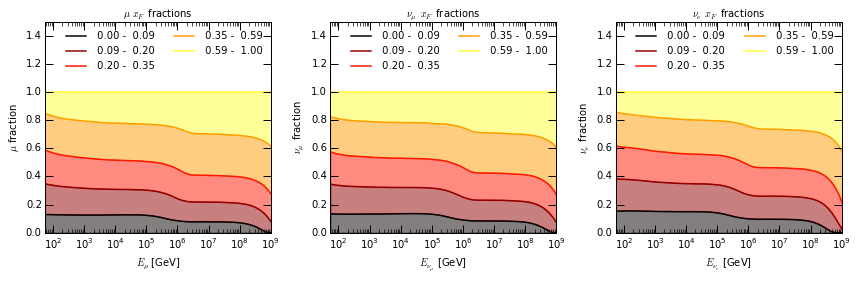

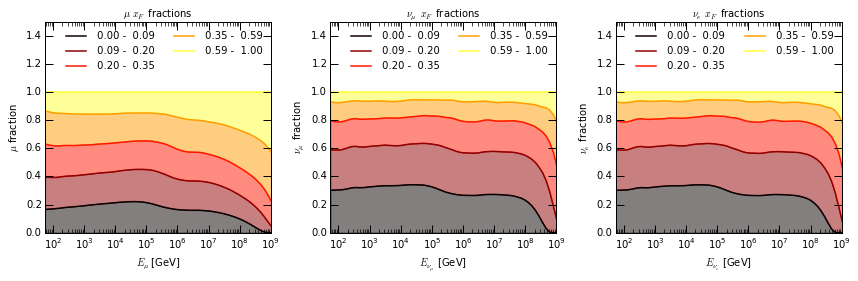

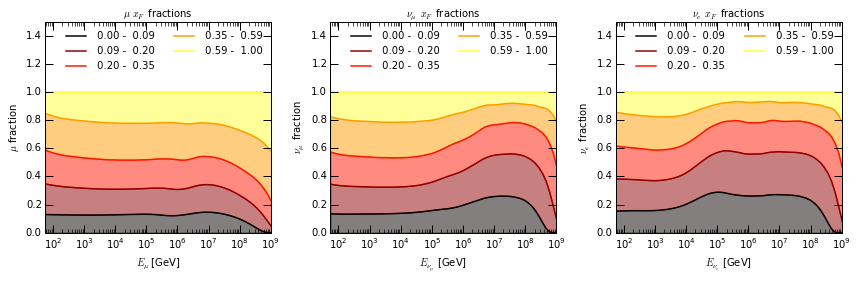

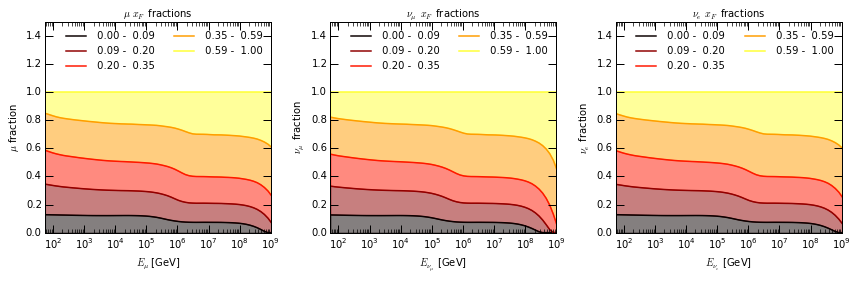

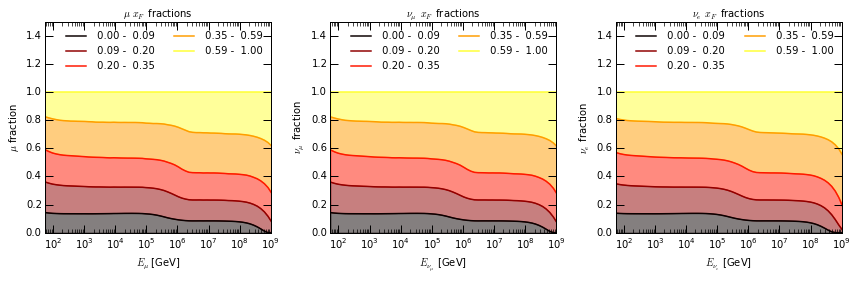

In [5]:
from matplotlib import cm
e_grid = mceq_run.e_grid
colors = np.linspace(0,1,len(flux_ranges) - 1)
#get path of the home directory + Desktop
parts = ['conv','pr','total','pi','k']
save_pdf = True
desktop = os.path.join(os.path.expanduser("~"),'OneDrive/Dokumente/Plots/plots_new_sibyll/RC4a')

for part in parts:
    plt.figure(figsize=(12., 4))
    gs = plt.GridSpec(1,3)
    pl = 0
    for pref, lab in [('mu_',r'\mu'), ('numu_',r'\nu_\mu'), ('nue_',r'\nu_e')]:
        ax1 = plt.subplot(gs[pl])
        ax1.set_title(r'${0}$ $x_F$ fractions'.format(lab))
        pl += 1
        ref = sum([flux[pref + part] for flux in flux_ranges[:-1]])
        between = None
        for i, t in enumerate(range_tups[:-1]):#

            r_str = '{0:5.2f} - {1:5.2f}'.format(xf_bins[t[0]], 
                                                 xf_bins[t[1] + 1 if t[1] != -1 else t[1]])
            flux = flux_ranges[i]
            if i == 0:
                between = np.zeros_like(ref)
            else:
                between += flux_ranges[i - 1][pref + part]/ref
            ax1.fill_between(e_grid,between, flux[pref + part]/ref+between,
                             color=cm.hot(float(i)/(len(flux_ranges)-1.),1. ), 
                             label=r_str, alpha=0.5)
            ax1.semilogx(e_grid,  flux[pref + part]/ref+between, 
                         color=cm.hot(float(i)/(len(flux_ranges)-1.),1. ), 
                         ls='-', lw=1.5,label=r_str)
            ax1.set_xlim(55,1e9)
            ax1.set_ylim(0,1.5)
            ax1.set_xlabel(r"$E_{{{0}}}$ [GeV]".format(lab))
            ax1.set_ylabel(r'${0}$ fraction'.format(lab))
    #         plt.ylabel(r"$\Phi_{" + lab + "}$ (E/GeV)$^{" + str(mag) +" }$" + 
    #                    "(cm$^{2}$ s sr GeV)$^{-1}$")
            ax1.legend(loc='upper right',ncol=2)
        plt.tight_layout()
        if save_pdf: plt.savefig(os.path.join(desktop, 'xf_' + part + '_sib23rc4b.pdf'))

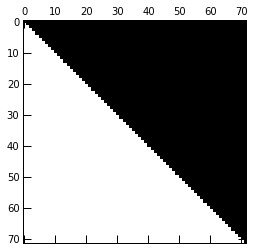

In [123]:
mat3 = np.zeros((mceq_run.y.dim,mceq_run.y.dim))
mceq_run.y.band = None
mceq_run.y.assign_yield_idx(2212,(0,mceq_run.y.dim),211,(0,mceq_run.y.dim),mat3)
plt.spy(mat3)